In [1]:
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pkl
import pandas as pd
import os,io,sys,glob, h5py, csv, time
import matplotlib.pyplot as plt
import json

from dlab import generalephys as ephys
from dlab import generalephys_mua as ephys_mua
from dlab import cell_pairs as pairs
from dlab import utils_pipeline as utils
#from dlab import utils_mua
from dlab import analysis_pipeline as analysis
from dlab import cell_pairs

from dlab.continuous_traces import gaussian_filter1d
from scipy.signal import find_peaks
from scipy.stats import pearsonr, spearmanr, zscore
from itertools import combinations 
from dlab import sorting_quality_editing as sq
from sklearn.manifold import TSNE
from scipy.cluster.vq import kmeans2
#from dlab import depth_estimation as depth
from dlab import PCA as pca
#from dlab import outcome


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import seaborn as sns
sns.set_style('white')
%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_style("white")
import warnings
warnings.filterwarnings('ignore')

In [2]:
def center(X):
    # X: ndarray, shape (n_features, n_samples)
    ss = StandardScaler(with_mean=True, with_std=True)
    Xc = ss.fit_transform(X.T).T
    return Xc

def z_score(X):
    ss = StandardScaler(with_mean=True, with_std = True)
    Xz = ss.fit_transform(X.T).T
    return Xz

def pca(tens):
    for i in range(min(tens.shape[0], tens.shape[1])-1):
        pca = PCA(n_components=i)
        p=pca.fit_transform(tens.T).T
        ev = (pca.explained_variance_ / sum(pca.explained_variance_))
    return p,ev

In [3]:
# be more intentional about start and end times for PCA
# aka get init and end times from curator

In [4]:
from skimage import io
im = io.imread(r'C:\Users\Kim\Desktop\MOBP17_fullFOV.tif')
print(im.shape)

(19, 125, 1030, 1033)


In [109]:
# z104/125
# t19/19 vs t1/t19
# 

In [156]:
ti = im[0,:,:,:]
tf = im[18,:,:,:]

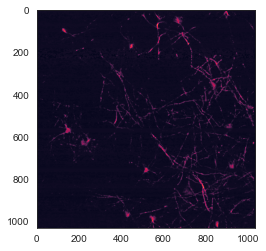

In [5]:
ti = im[0,99,:,:]
#plt.imshow(ti)
ti_avg = center(ti)
plt.imshow(ti_avg)

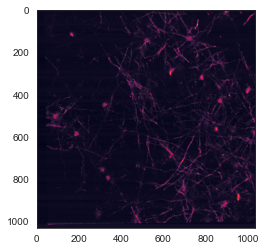

In [144]:
tf = im[18,99,:,:]
tf_avg = center(tf)
plt.imshow(tf_avg)

In [ ]:
matrix = y_true

In [73]:
dims = y_true.shape
for i in range(dims[0]):
    for j in range(dims[1]):
        for k in range(dims[2]):
            print("Element of np array with indices {} is equal to {}".format([i, j, k], y_true[i, j, k]))

Element of np array with indices [0, 0, 0] is equal to 1.0
Element of np array with indices [0, 1, 0] is equal to 0.0
Element of np array with indices [0, 2, 0] is equal to 3.0
Element of np array with indices [1, 0, 0] is equal to 5.0
Element of np array with indices [1, 1, 0] is equal to 0.0
Element of np array with indices [1, 2, 0] is equal to 0.0


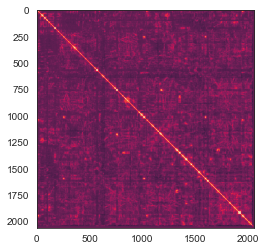

In [146]:
plt.imshow(np.cov(ti_avg,tf_avg))

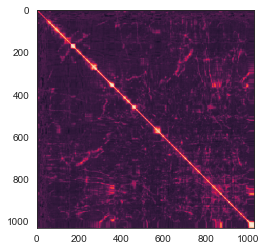

In [27]:
plt.imshow(np.cov(ti_avg))

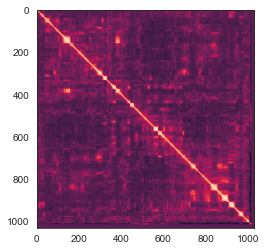

In [22]:
plt.imshow(np.cov(tf_avg))

In [82]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [88]:
from scipy import ndimage

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [95]:
from scipy import ndimage

In [101]:
img = ndimage.gaussian_filter(ti_avg, sigma = 2)

In [7]:
plt.imshow(img)

NameError: name 'img' is not defined

In [103]:
g, theta = sobel_filters(img)

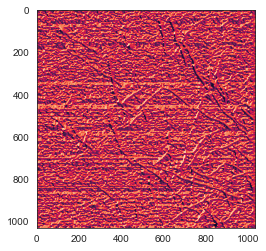

In [106]:
plt.imshow(theta)

In [10]:
from scipy.spatial import distance_matrix

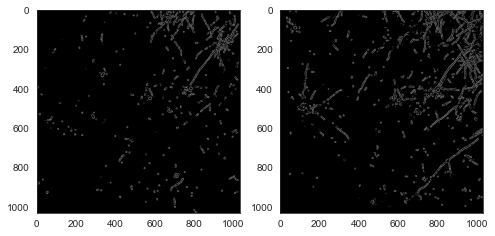

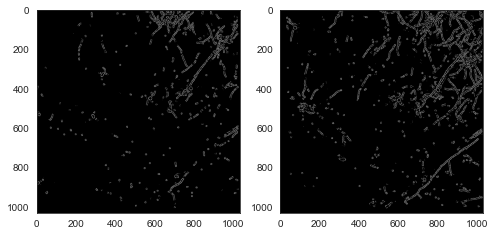

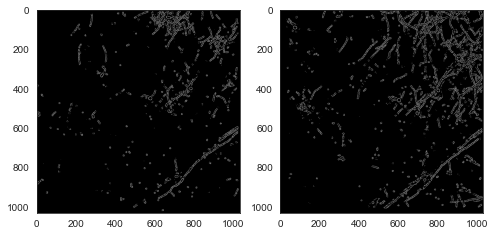

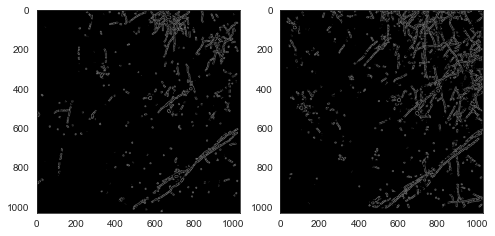

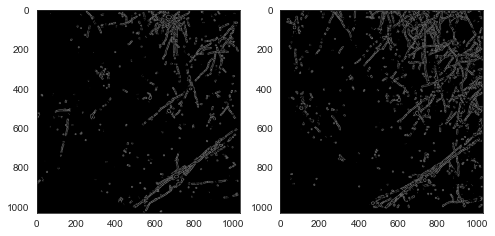

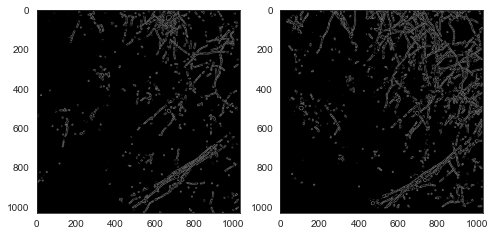

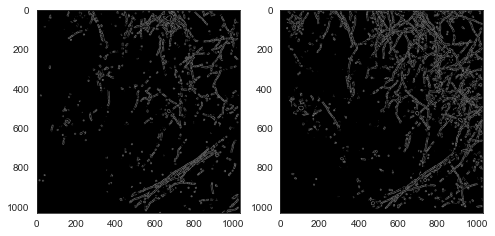

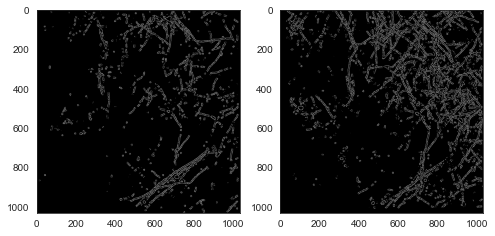

KeyboardInterrupt: 

In [5]:
import cv2
t_i = im[0,:,:,:]
t_f = im[18,:,:,:]

for i,bleh in enumerate(t_i):
    if i >85 and i <112:
        img_i = t_i[i]
        img_bluri = cv2.GaussianBlur(img_i, (7,7), 7) 
        img_bluri = np.uint8(img_bluri)
        edges_i = cv2.Canny(image=img_bluri, threshold1=10, threshold2=10) # Canny Edge Detection
        imgf = t_f[i]
        img_blurf = cv2.GaussianBlur(imgf, (7,7), 7) 
        img_blurf = np.uint8(img_blurf)
        edges_f = cv2.Canny(image=img_blurf, threshold1=10, threshold2=10) # Canny Edge Detection
        
        #fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,14))
        #ax1.imshow(img_i,cmap='Greys_r')
        #ax2.imshow(imgf,cmap='Greys_r')
        #ax1.set_title(i)
        #plt.show()
        #plt.close()
        #dist_mat = distance_matrix(edges_i, edges_f, p=2)
        fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,8))
        ax1.imshow(edges_i,cmap='Greys_r')
        #ax1.set_title(dist_mat)
        ax2.imshow(edges_f,cmap='Greys_r')
        #ax3.imshow(dist_mat)
        plt.show()
        plt.close()


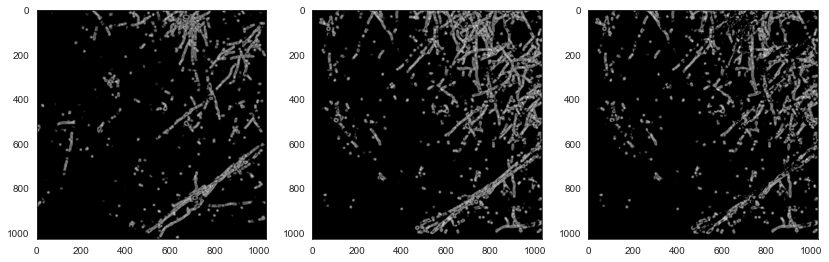

In [15]:
ti = im[0,90,:,:]
tf = im[18,90,:,:]

img = ti
#plt.imshow(img)

img_blur = cv2.GaussianBlur(img, (7,7), 7) 
 
img_blur = np.uint8(img_blur)
edges_i = cv2.Canny(image=img_blur, threshold1=10, threshold2=10) # Canny Edge Detection

img = tf
#plt.imshow(img)
 
img_blur = cv2.GaussianBlur(img, (7,7), 7) 

img_blur = np.uint8(img_blur)
edges_f = cv2.Canny(image=img_blur, threshold1=10, threshold2=10) # Canny Edge Detection
#cov = np.cov(ti,tf)
#plt.imshow(cov)
bluri = cv2.GaussianBlur(edges_i, (7,7), 7) 
blurf = cv2.GaussianBlur(edges_f, (7,7), 7) 

sub = cv2.subtract(blurf, bluri)

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(14,14))
ax1.imshow(bluri,cmap='Greys_r')
ax2.imshow(blurf,cmap='Greys_r')
ax3.imshow(sub, cmap='Greys_r')

In [9]:
cv2.phaseCorrelate(edges_i,edges_f)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\phasecorr.cpp:527: error: (-215:Assertion failed) src1.type() == CV_32FC1 || src1.type() == CV_64FC1 in function 'cv::phaseCorrelate'


In [3]:
ti = im[0,90,:,:]
tf = im[18,90,:,:]

img = ti
#plt.imshow(img)

img_blur = cv2.GaussianBlur(img, (7,7), 7) 
 
img_blur = np.uint8(img_blur)
edges_i = cv2.Canny(image=img_blur, threshold1=10, threshold2=10) # Canny Edge Detection

img = tf
#plt.imshow(img)
 
img_blur = cv2.GaussianBlur(img, (7,7), 7) 

img_blur = np.uint8(img_blur)
edges_f = cv2.Canny(image=img_blur, threshold1=10, threshold2=10) # Canny Edge Detection

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,14))
ax1.imshow(edges_i,cmap='Greys_r')
ax2.imshow(edges_f,cmap='Greys_r')

NameError: name 'cv2' is not defined

In [140]:
from tifffile import imsave
imsave(r'C:\Users\Kim\Documents\Data\kimdata\sheath_analysis_timepoint_remyelin.tif',edges_f)

In [19]:
import cv2
background = im[0,90,:,:]
overlay = im[18,90,:,:]

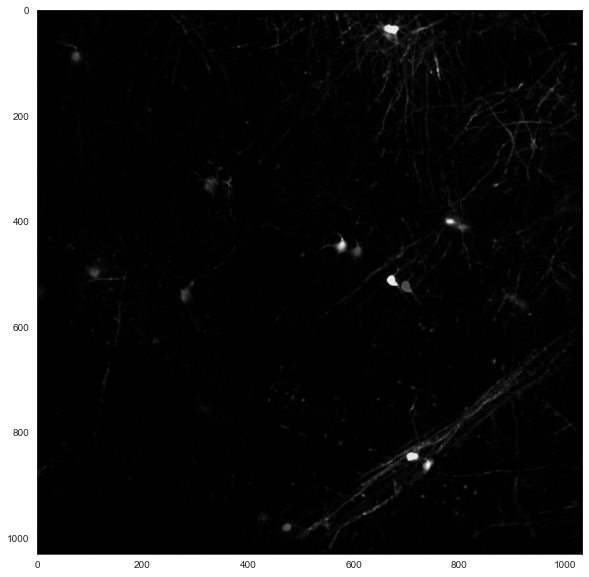

In [20]:
background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)
overlay= cv2.cvtColor(overlay, cv2.COLOR_GRAY2RGB)
dst = cv2.addWeighted(background,0.9,overlay,0.3,0)
#cv2.imshow('Image',dst)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.subplots(figsize=(15, 10))
plt.imshow(dst)

# CLUSTERING

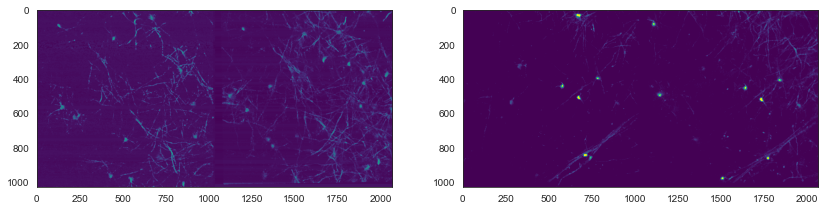

In [149]:
test = cv2.hconcat([ti_avg, tf_avg])
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
#pixel_vals = test.reshape((-1,2))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 15
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((test.shape))

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,20))
ax1.imshow(test,cmap='viridis')
ax2.imshow(segmented_image,cmap='viridis')

# masking

In [105]:
masked_image = np.copy(test)
# convert to the shape of a vector of pixel values
#masked_image = masked_image.reshape((-1, 2))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [0,0,0,0,0,0,0,0,0,0]
# convert back to original shape
#masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1030 but corresponding boolean dimension is 1063990

In [ ]:
# have low concrodance with demyelination group

In [23]:
cv2.drawContours(mask, -1, 255, -1) # Draw filled contour in mask
out = np.zeros_like(imgray) # Extract out the object and place into output image
out[mask == 255] = imgray[mask == 255]

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'drawContours'
> Overload resolution failed:
>  - Can't parse 'contours'. Input argument doesn't provide sequence protocol
>  - Can't parse 'contours'. Input argument doesn't provide sequence protocol


In [26]:
edg = edges

In [27]:
contours, hierarchy = cv2.findContours(edg, 
    cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
cv2.imshow('Canny Edges After Contouring', edg)
cv2.waitKey(0)
  
print("Number of Contours found = " + str(len(contours)))
  
# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(edges, contours, -1, (0, 255, 0), 1)
  
cv2.imshow('Contours', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Contours found = 3


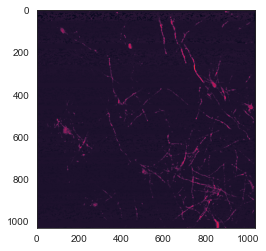

In [39]:
plt.imshow(ti_avg)

In [5]:
path = r'C:\Users\Kim\Documents\Data\daileydata'
df = pd.read_json(os.path.join(path,'df_all_mice_09_24_21.json'))
df_reaches = pd.read_json(os.path.join(path,'df_reaches_aligned_092621.json'))

In [10]:
df = df[df.mouse!=49]

In [21]:
trial_averages = []

for mouseid in df.mouse.unique():
    
    print(mouseid)
    dfr_ = df_reaches[df_reaches.mouse==mouseid]
    df_ = df[df.mouse==mouseid]

    ave_reach,normedbins,ave_reach_  = analysis.reachave_tensor(df_,dfr_,start = -0.5,end = 0.5)  

    trial_averages.append(ave_reach)
    
#Xa = np.hstack(trial_averages)

Xa = z_score(trial_averages)

traj,ev = pca(Xa)

11
12
22
24
19
20
26
28
42
43
50
51
47
59
58
53
56
63
66
69
68
70
64
71
65
67


AttributeError: 'list' object has no attribute 'T'

In [15]:
np.shape(trial_averages)

(26, 3)

In [17]:
np.shape(trial_averages[0])

(3, 154, 49)

In [18]:
np.shape(ave_reach)

(3, 238, 49)